In [8]:
!pip install -q diffusers transformers accelerate torch safetensors


In [9]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image


In [10]:
model_id = "runwayml/stable-diffusion-v1-5"

if torch.cuda.is_available():
    print("CUDA is available, using GPU.")
    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float16
    )
    pipe = pipe.to("cuda")
else:
    print("CUDA is not available, using CPU.")
    pipe = StableDiffusionPipeline.from_pretrained(
        model_id
    )
    pipe = pipe.to("cpu")

CUDA is available, using GPU.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


  0%|          | 0/50 [00:00<?, ?it/s]

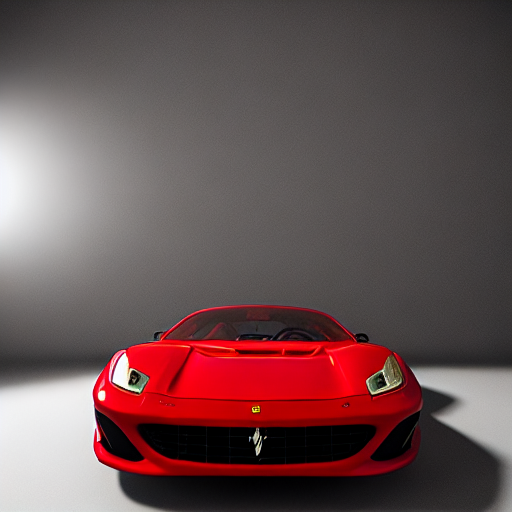

In [11]:
prompt = "a red Ferrari sports car, ultra realistic, studio lighting, 4k, detailed"

image = pipe(prompt).images[0]

image


In [12]:
image.save("generated_car.png")
print("Image saved as generated_car.png")


Image saved as generated_car.png


  0%|          | 0/50 [00:00<?, ?it/s]

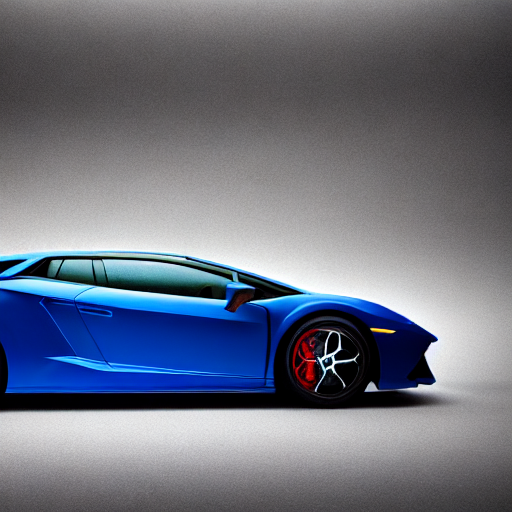

  0%|          | 0/50 [00:00<?, ?it/s]

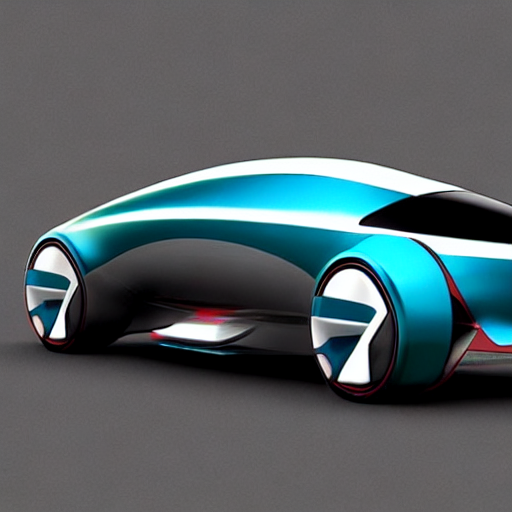

  0%|          | 0/50 [00:00<?, ?it/s]

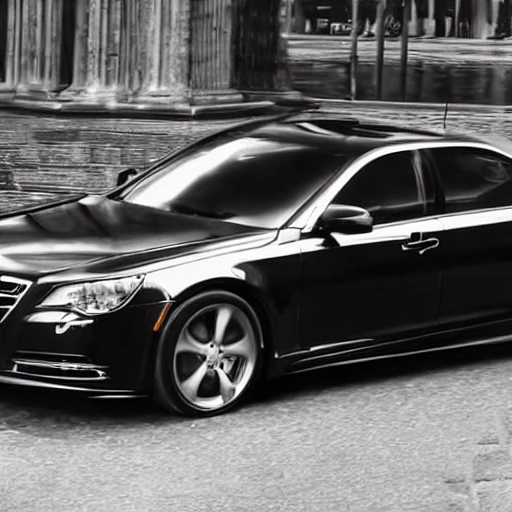

  0%|          | 0/50 [00:00<?, ?it/s]

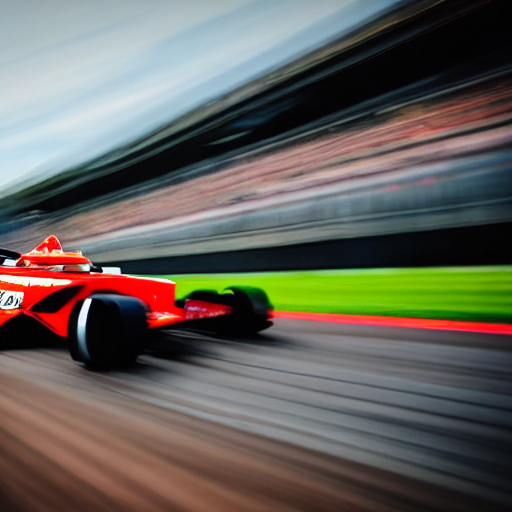

In [13]:
prompts = [
    "a blue Lamborghini sports car, cinematic lighting",
    "a futuristic electric car, concept design",
    "a luxury black sedan car, realistic photo",
    "a racing car on a track, motion blur"
]

for i, p in enumerate(prompts):
    img = pipe(p).images[0]
    img.save(f"car_{i}.png")
    display(img)


  0%|          | 0/40 [00:00<?, ?it/s]

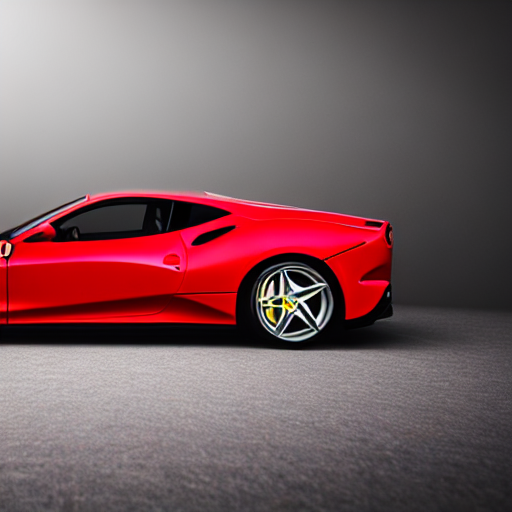

In [14]:
image = pipe(
    prompt,
    guidance_scale=8.5,   # higher = more accurate
    num_inference_steps=40
).images[0]

display(image)
